# End-to-end Learning for Early Classification of Time Series (ELECTS)

## Train and predict with an RNN trained with ELECTS

Early predictions with the RNN model.

Please run `python train.py` first to generate `snapshots/model.pth`

In [1]:
!python train.py --dataset breizhcrops

^C


downloading C:\Users\anyam\elects_data\breizhcrops\2017\L1C\frh01.h5.tar.gz
extracting C:\Users\anyam\elects_data\breizhcrops\2017\L1C\frh01.h5.tar.gz to C:\Users\anyam\elects_data\breizhcrops\2017\L1C\frh01.h5
removing C:\Users\anyam\elects_data\breizhcrops\2017\L1C\frh01.h5.tar.gz



classmapping.csv: 0.00B [00:00, ?B/s]
classmapping.csv: 8.19kB [00:00, 35.5kB/s]
classmapping.csv: 8.19kB [00:00, 35.5kB/s]

frh01.csv: 0.00B [00:00, ?B/s]
frh01.csv:   0%|          | 8.19k/13.9M [00:00<07:08, 32.5kB/s]
frh01.csv:   2%|▏         | 344k/13.9M [00:00<00:11, 1.22MB/s] 
frh01.csv:   9%|▉         | 1.22M/13.9M [00:00<00:03, 3.19MB/s]
frh01.csv:  20%|█▉        | 2.75M/13.9M [00:00<00:01, 6.64MB/s]
frh01.csv:  27%|██▋       | 3.82M/13.9M [00:00<00:01, 7.72MB/s]
frh01.csv:  35%|███▍      | 4.87M/13.9M [00:00<00:01, 8.48MB/s]
frh01.csv:  44%|████▍     | 6.11M/13.9M [00:00<00:00, 9.60MB/s]
frh01.csv:  53%|█████▎    | 7.41M/13.9M [00:01<00:00, 10.5MB/s]
frh01.csv:  59%|█████▉    | 8.26M/13.9M [00:01<00:00, 9.53MB/s]
frh01.csv:  66%|██████▌   | 9.13M/13.9M [00:01<00:00, 9.27MB/s]
frh01.csv:  72%|███████▏  | 10.0M/13.9M [00:01<00:00, 9.07MB/s]
frh01.csv:  80%|███████▉  | 11.1M/13.9M [00:01<00:00, 9.55MB/s]
frh01.csv:  88%|████████▊ | 12.3M/13.9M [00:01<00:00, 9.77MB/s]
frh01.csv: 

## Import dependencies

In [1]:
import torch
from data import BavarianCrops, CLASSES
import matplotlib.pyplot as plt
from earlyrnn import EarlyRNN
import seaborn as sns
import numpy as np

In [2]:
ds = BavarianCrops(partition="eval")
model = EarlyRNN()
model.eval()
model.load_state_dict(torch.load("snapshots/model.pth"))

no dataset found in C:\Users\anyam/holl. downloading...
[==================================================]untar C:\Users\anyam\holl.tar.gz to C:\Users\anyam


<All keys matched successfully>

## Take time series sample from dataset

The dataset contains Sentinel 2 satellite time series of Bavarian fields in 2018.
Each line represents spectral reflectances in one of 13 bands acquired by the satellite over the year.

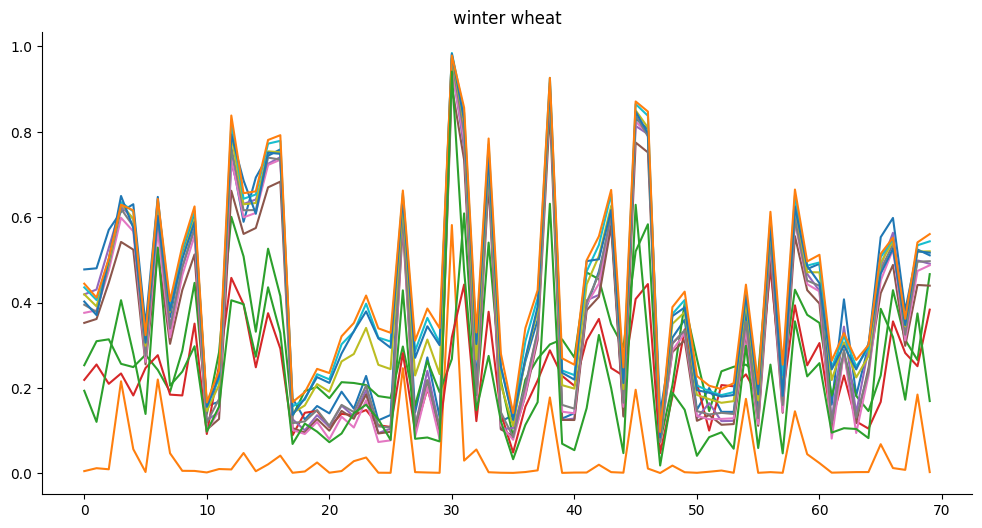

In [5]:
# change this to take different samples
index = 456

X,y = ds[index]

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(X)
ax.set_title(CLASSES[y[0]])
sns.despine(offset=0.2)

## Predict with the model

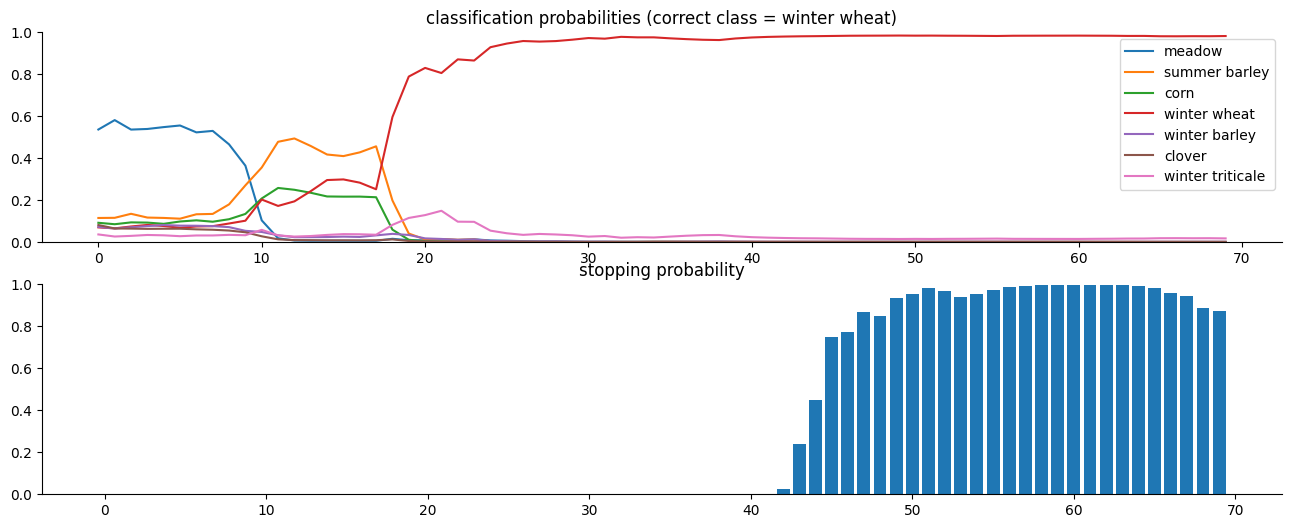

In [6]:
# change this T parameter to simulate shorter time series
T = 70

log_class_probabilities, probabilitiy_stopping = model(X[:T].unsqueeze(0))

# visualize
fig, axs = plt.subplots(2,1, figsize=(16,6))
ax = axs[0]
ax.plot(log_class_probabilities[0].exp().detach().numpy())
ax.set_ylim(0,1)
ax.legend(CLASSES, loc=1)
ax.set_title(f"classification probabilities (correct class = {CLASSES[y[0]]})")
ax = axs[1]
ax.bar(x = np.arange(probabilitiy_stopping.shape[1]), height = probabilitiy_stopping[0].detach().numpy())
ax.set_title("stopping probability")
ax.set_ylim(0,1)
sns.despine(offset=0.2)